# PS 2           
Kanyao Han

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold
import statsmodels.api as sm
import pandas as pd

F:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\python\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
F:\python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Part 1      
### 2)

In [2]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
prcntl = np.array([0.25,0.25,0.20,0.10,0.10,0.09,0.01])
inc_vec = [sum(prcntl[:i+1]) - (prcntl[i]/2) for i in range(len(prcntl))]
age_vec = np.arange(18, 96)

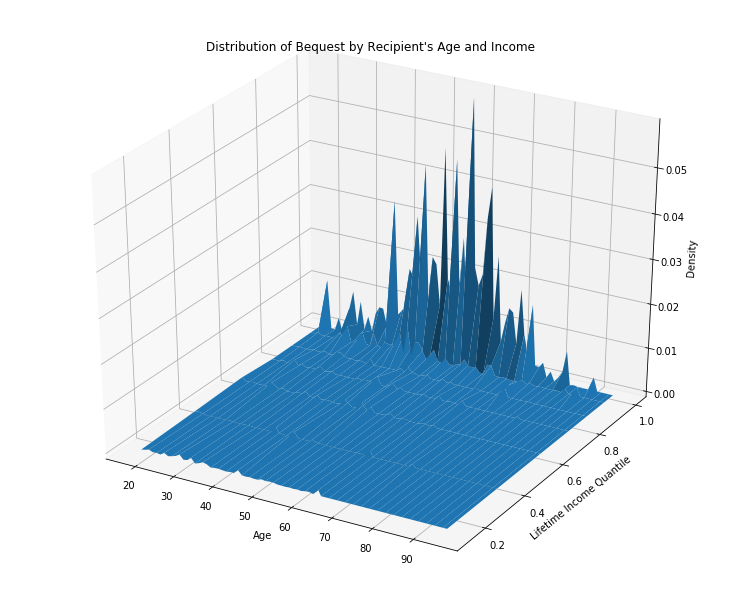

In [3]:
y_mat, x_mat = np.meshgrid(inc_vec, age_vec)
fig = plt.figure(figsize =(10,8))
ax = Axes3D(fig)
ax.plot_surface(x_mat, y_mat, bq_data)
plt.title("Distribution of Bequest by Recipient's Age and Income")
plt.xlabel("Age")
plt.ylabel("Lifetime Income Quantile")
ax.set_zlabel("Density")
plt.show()

### b)

In [4]:
prob_inc = np.sum(bq_data, axis=0)
prob_age = np.sum(bq_data, axis=1)
num_sample = 10000
inc_probs = np.random.multinomial(num_sample, prob_inc)
age_probs = np.random.multinomial(num_sample, prob_age)
age_freq = np.array([])
inc_freq = np.array([])

In [5]:
for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

for pct, num_j in zip(inc_vec, inc_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= pct
    inc_freq = np.append(inc_freq, vec_abil_j)

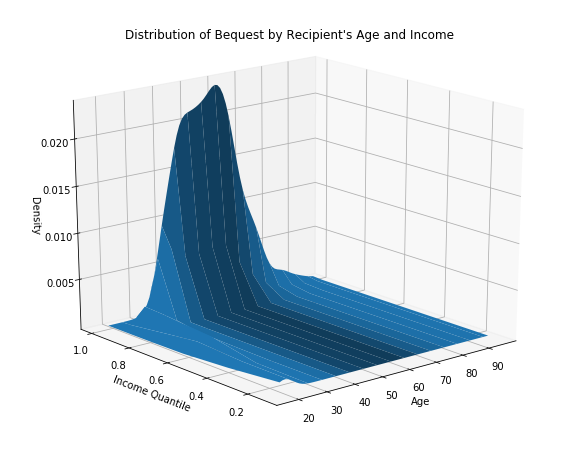

In [6]:
bandwith = num_sample ** (-1./(3+4))
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwith)

inc_mat, age_mat = np.meshgrid(inc_vec, age_vec)
coords = np.vstack([item.ravel() for item in [age_mat, inc_mat]])
BQkde = density(coords).reshape(age_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()
fig = plt.figure(figsize =(10,8))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, inc_mat, BQkde_scaled, rstride =5)
ax.view_init(elev=20., azim=-130)
plt.title("Distribution of Bequest by Recipient's Age and Income")
ax.set_xlabel('Age')
ax.set_ylabel('Income Quantile')
ax.set_zlabel('Density')
plt.show()

In [7]:
print("I use Scott's Rule to calculate the lambda [num_sample ** (-1./(dimensions + 4))]. It's value is", bandwith)
print()
print("The estimated density of who are 61 and in 6th quantile income is: \n{}".format(BQkde_scaled[61,6]))

I use Scott's Rule to calculate the lambda [num_sample ** (-1./(dimensions + 4))]. It's value is 0.2682695795279726

The estimated density of who are 61 and in 6th quantile income is: 
0.0022582951953501844


## Part 2

In [8]:
biden = pd.read_csv('biden.csv')

In [9]:
X = biden[['age', 'educ']]
y = biden['biden']
X['age*educ'] = X['age'] * X['educ']
X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop')

F:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        06:15:19   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5491      9.491      3.956      0.0

F:\python\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


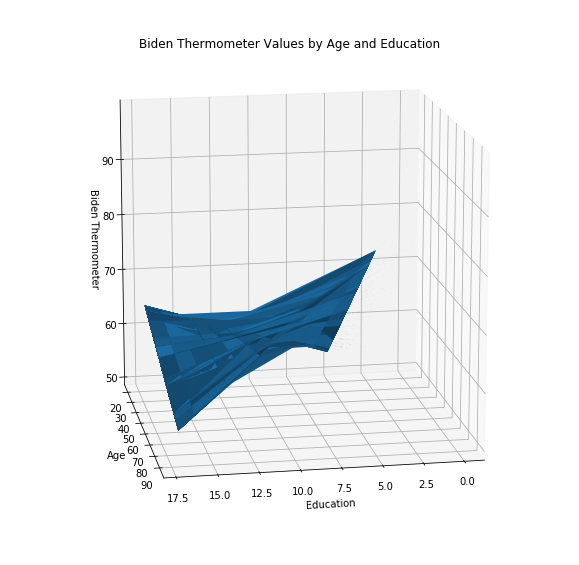

In [11]:
fig = plt.figure(figsize =(10,10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.array(biden.educ), np.array(biden.age))
preds = []
for i, j in zip(X,Y):
    preds.append(37.5491 + (0.6674*j) + (1.7123 * i) + (i * j * -0.0477))
Z = np.array(preds)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Biden Thermometer')
plt.title("Biden Thermometer Values by Age and Education")
ax.view_init(15, 80)
plt.show()

### a)
The marginal effect of age on biden is $0.6674 - 0.0477*educ$. It means one unit increase of education will lead to a 0.0477 decrease of the effect of age on biden. Since the p-values of age and the interaction term of age and educ are all close to 0, the results are statistically significant. Besides, if the education year is more than $\frac{0.6674}{0.0477}\approx14$, the marginal effect of age will become negative.

### b)
The marginal effect of education on biden is $1.7123 - 0.0477*educ$. It means one unit increase of age will lead to a 0.0477 decrease of the effect of education on biden. Since the p-values of education and the interaction term of age and educ are all less than 0.05, the results are statistically significant. Besides, if a person is older than $\frac{1.7123}{0.0477}\approx35.9$, the marginal effect of education will become negative.

## Part 3

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import time
import statsmodels.api as sm
import dask

In [13]:
auto = pd.read_csv('Auto.csv', na_values='?')
auto = auto.dropna()
auto['mpg_high'] = auto['mpg'].apply(lambda x: 1 if x >= auto['mpg'].median() else 0)
Y = auto['mpg_high']
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

### a)

In [14]:
def timer(func):
    from time import time
    def inner(*args):
        start = time()
        a = func()
        end = time()
        print('\nTime elapsed =', end-start, 'seconds')
        return a
    return inner

@timer
def serial():
    N = 100
    lazy_values = []

    for bs_ind in range(N):
        np.random.seed(seed=bs_ind)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
        LogReg = LogisticRegression()
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        lazy_values.append((y_test != y_pred).mean())
    
    lazy_values = np.array(lazy_values)
    MSE_bs = lazy_values.mean()
    MSE_bs_std = lazy_values.std()
    print('error rate = ', MSE_bs,
          '\nstd = ', MSE_bs_std)

In [15]:
serial()

error rate =  0.10152173913043479 
std =  0.02150831572793732

Time elapsed = 0.42880749702453613 seconds


### b)

In [16]:
from dask import compute, delayed
import dask.multiprocessing
import dask.threaded

def bootstrap(bs_ind, X, Y):
    np.random.seed(seed=bs_ind)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    return (y_test != y_pred).mean()

lazy_values = []

for bs_ind in range(100):
    lazy_values.append(delayed(bootstrap)(bs_ind, X, Y))

In [17]:
@timer
def parallel():
    lazy_values = []
    for bs_ind in range(100):
        lazy_values.append(delayed(bootstrap)(bs_ind, X, Y))

    results_par = compute(*lazy_values, get=dask.threaded.get, num_workers=3)
    MSE_vec_bs = np.array(results_par)
    MSE_bs = MSE_vec_bs.mean()
    MSE_bs_std = MSE_vec_bs.std()
    print('error rate = ', MSE_bs,
          '\nstd = ', MSE_bs_std)

In [19]:
parallel()

error rate =  0.1022463768115942 
std =  0.02134657650543561

Time elapsed = 0.3408327102661133 seconds
